In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler

In [ ]:
df = pd.read_csv('/AAPL.csv')

In [ ]:
print(df)

           Date        Open        High         Low       Close   Adj Close  \
0    2022-08-15  171.520004  173.389999  171.350006  173.190002  172.168625   
1    2022-08-16  172.779999  173.710007  171.660004  173.029999  172.009567   
2    2022-08-17  172.770004  176.149994  172.570007  174.550003  173.520615   
3    2022-08-18  173.750000  174.899994  173.119995  174.149994  173.122955   
4    2022-08-19  173.029999  173.740005  171.309998  171.520004  170.508469   
..          ...         ...         ...         ...         ...         ...   
246  2023-08-08  179.690002  180.270004  177.580002  179.800003  179.557526   
247  2023-08-09  180.869995  180.929993  177.009995  178.190002  177.949707   
248  2023-08-10  179.479996  180.750000  177.600006  177.970001  177.729996   
249  2023-08-11  177.320007  178.619995  176.550003  177.789993  177.789993   
250  2023-08-14  177.970001  179.690002  177.309998  179.460007  179.460007   

       Volume  
0    54091700  
1    56377100  
2  

In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-08-15,171.520004,173.389999,171.350006,173.190002,172.168625,54091700
1,2022-08-16,172.779999,173.710007,171.660004,173.029999,172.009567,56377100
2,2022-08-17,172.770004,176.149994,172.570007,174.550003,173.520615,79542000
3,2022-08-18,173.750000,174.899994,173.119995,174.149994,173.122955,62290100
4,2022-08-19,173.029999,173.740005,171.309998,171.520004,170.508469,70346300


In [ ]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
246,2023-08-08,179.690002,180.270004,177.580002,179.800003,179.557526,67823000
247,2023-08-09,180.869995,180.929993,177.009995,178.190002,177.949707,60378500
248,2023-08-10,179.479996,180.750000,177.600006,177.970001,177.729996,54686900
249,2023-08-11,177.320007,178.619995,176.550003,177.789993,177.789993,51988100
250,2023-08-14,177.970001,179.690002,177.309998,179.460007,179.460007,43597400


In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,159.357650,161.118088,157.749920,159.480956,158.944364,7.039958e+07
std,18.261758,18.014194,18.538920,18.250457,18.386614,2.362941e+07
min,126.010002,127.769997,124.169998,125.019997,124.488876,3.145820e+07
25%,145.815002,147.340004,144.014999,145.919998,145.274208,5.242335e+07
50%,154.789993,157.089996,153.369995,155.000000,154.394058,6.579930e+07
75%,173.025002,173.964996,171.745002,173.345001,172.891701,8.135480e+07
max,196.240005,198.229996,195.279999,196.449997,196.185074,1.647624e+08


Sorting the data


Checking for null values

In [ ]:
NAN = [(c,df[c].isnull().mean()*100) for c in df]
NAN = pd.DataFrame(NAN, columns=['column_name','percentage'])
NAN

,column_name,percentage
0,Date,0.0
1,Open,0.0
2,High,0.0
3,Low,0.0
4,Close,0.0
5,Adj Close,0.0
6,Volume,0.0


In [ ]:
srt=df.sort_values(by='Date')
srt.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-08-15,171.520004,173.389999,171.350006,173.190002,172.168625,54091700
1,2022-08-16,172.779999,173.710007,171.660004,173.029999,172.009567,56377100
2,2022-08-17,172.770004,176.149994,172.570007,174.550003,173.520615,79542000
3,2022-08-18,173.750000,174.899994,173.119995,174.149994,173.122955,62290100
4,2022-08-19,173.029999,173.740005,171.309998,171.520004,170.508469,70346300


In [ ]:
srt.reset_index(inplace=True)

In [ ]:
srt.head()

,index,Date,Open,High,Low,Close,Adj Close,Volume
0,0,2022-08-15,171.520004,173.389999,171.350006,173.190002,172.168625,54091700
1,1,2022-08-16,172.779999,173.710007,171.660004,173.029999,172.009567,56377100
2,2,2022-08-17,172.770004,176.149994,172.570007,174.550003,173.520615,79542000
3,3,2022-08-18,173.750000,174.899994,173.119995,174.149994,173.122955,62290100
4,4,2022-08-19,173.029999,173.740005,171.309998,171.520004,170.508469,70346300


Data visulization

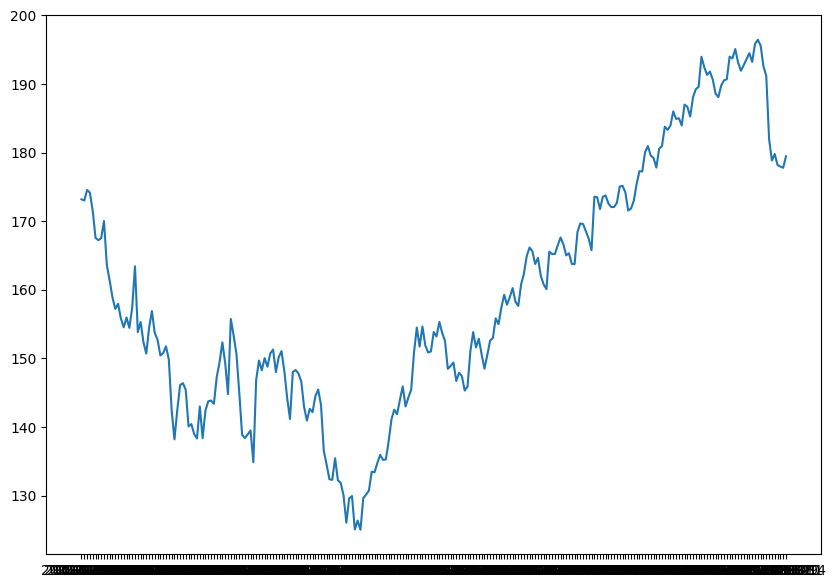

In [ ]:
plt.figure(figsize=(10,7))
plt.plot(srt['Date'],srt['Close'])

In [ ]:
close_srt = srt['Close']
close_srt

0      173.190002
1      173.029999
2      174.550003
3      174.149994
4      171.520004
          ...    
246    179.800003
247    178.190002
248    177.970001
249    177.789993
250    179.460007
Name: Close, Length: 251, dtype: float64

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
close_srt = scaler.fit_transform(np.array(close_srt).reshape(-1,1))
close_srt

array([[6.74366583e-01],
       [6.72126585e-01],
       [6.93406216e-01],
       [6.87806202e-01],
       [6.50987078e-01],
       [5.95688226e-01],
       [5.90928167e-01],
       [5.95128125e-01],
       [6.30127425e-01],
       [5.40389164e-01],
       [5.09029931e-01],
       [4.74450609e-01],
       [4.50791040e-01],
       [4.61150917e-01],
       [4.31051393e-01],
       [4.13131765e-01],
       [4.33151477e-01],
       [4.12151897e-01],
       [4.52890914e-01],
       [5.37729189e-01],
       [4.03471917e-01],
       [4.24051533e-01],
       [3.82892314e-01],
       [3.59512810e-01],
       [4.12431737e-01],
       [4.46311032e-01],
       [4.01792020e-01],
       [3.88072351e-01],
       [3.55732829e-01],
       [3.60492888e-01],
       [3.74352485e-01],
       [3.47473037e-01],
       [2.44435097e-01],
       [1.84516310e-01],
       [2.44015120e-01],
       [2.95114224e-01],
       [2.99313972e-01],
       [2.85734229e-01],
       [2.10975766e-01],
       [2.15595702e-01],


In [ ]:
train_size = int(len(close_srt)*0.5)
test_size = len(close_srt) - train_size
train_data,test_data = close_srt[0:train_size,:],close_srt[train_size:len(close_srt),:1]


In [ ]:
train_data.shape

(125, 1)

In [ ]:
test_data.shape

(126, 1)

In [ ]:
def create_dataset(dataset,time_step=1):
  dataX,dataY = [],[]
  for i in range(len(dataset)-time_step-1):
    a = dataset[i:(i + time_step),0]
    dataX.append(a)
    dataY.append(dataset[i+time_step,0])
  return np.array(dataX),np.array(dataY)

In [ ]:
time_step = 80
x_train,y_train = create_dataset(train_data,time_step)
x_test,y_test = create_dataset(test_data,time_step)


In [ ]:
print(x_train.shape),print(y_train.shape)

(44, 80)
(44,)


(None, None)

In [ ]:
print(x_test.shape),print(y_test.shape)

(45, 80)
(45,)


(None, None)

In [ ]:
x_train=x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test=x_test.reshape(x_test.shape[0],x_test.shape[1],1)

In [ ]:
x_train

array([[[0.67436658],
        [0.67212659],
        [0.69340622],
        ...,
        [0.31905363],
        [0.30253406],
        [0.25045509]],

       [[0.67212659],
        [0.69340622],
        [0.6878062 ],
        ...,
        [0.30253406],
        [0.25045509],
        [0.22287561]],

       [[0.69340622],
        [0.6878062 ],
        [0.65098708],
        ...,
        [0.25045509],
        [0.22287561],
        [0.24681502]],

       ...,

       [[0.18647626],
        [0.25157508],
        [0.18703637],
        ...,
        [0.36119292],
        [0.41271179],
        [0.37393251]],

       [[0.25157508],
        [0.18703637],
        [0.24345523],
        ...,
        [0.41271179],
        [0.37393251],
        [0.41481166]],

       [[0.18703637],
        [0.24345523],
        [0.2622148 ],
        ...,
        [0.37393251],
        [0.41481166],
        [0.37659248]]])

In [ ]:
x_test

array([[[0.40361205],
        [0.39451211],
        [0.42433158],
        ...,
        [0.76382479],
        [0.75864497],
        [0.73918536]],

       [[0.39451211],
        [0.42433158],
        [0.40165211],
        ...,
        [0.75864497],
        [0.73918536],
        [0.77768459]],

       [[0.42433158],
        [0.40165211],
        [0.38541238],
        ...,
        [0.73918536],
        [0.77768459],
        [0.78314448]],

       ...,

       [[0.56264889],
        [0.56292873],
        [0.58028845],
        ...,
        [0.79756416],
        [0.75360505],
        [0.76690475]],

       [[0.56292873],
        [0.58028845],
        [0.59652818],
        ...,
        [0.75360505],
        [0.76690475],
        [0.74436518]],

       [[0.58028845],
        [0.59652818],
        [0.5828083 ],
        ...,
        [0.76690475],
        [0.74436518],
        [0.74128523]]])

Creating the stacked LSTM Model

In [ ]:
 from tensorflow.keras.models import Sequential
 from tensorflow.keras.layers import Dense
 from tensorflow.keras.layers import LSTM

In [ ]:
model=Sequential()
model.add(LSTM(40,return_sequences=True,input_shape=(80,1)))
model.add(LSTM(40,return_sequences=True))
model.add(LSTM(40))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 80, 40)            6720      
                                                                 
 lstm_1 (LSTM)               (None, 80, 40)            12960     
                                                                 
 lstm_2 (LSTM)               (None, 40)                12960     
                                                                 
 dense (Dense)               (None, 1)                 41        
                                                                 
Total params: 32,681
Trainable params: 32,681
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(x_train,y_train,validation_split=0.1,epochs=50,batch_size=54,verbose=1)

Epoch 1/50
1/1 [==============================] - 8s 8s/step - loss: 0.0367 - val_loss: 0.1282
Epoch 2/50
1/1 [==============================] - 0s 137ms/step - loss: 0.0260 - val_loss: 0.1044
Epoch 3/50
1/1 [==============================] - 0s 129ms/step - loss: 0.0181 - val_loss: 0.0823
Epoch 4/50
1/1 [==============================] - 0s 132ms/step - loss: 0.0127 - val_loss: 0.0616
Epoch 5/50
1/1 [==============================] - 0s 146ms/step - loss: 0.0101 - val_loss: 0.0443
Epoch 6/50
1/1 [==============================] - 0s 130ms/step - loss: 0.0110 - val_loss: 0.0350
Epoch 7/50
1/1 [==============================] - 0s 141ms/step - loss: 0.0130 - val_loss: 0.0330
Epoch 8/50
1/1 [==============================] - 0s 139ms/step - loss: 0.0131 - val_loss: 0.0352
Epoch 9/50
1/1 [==============================] - 0s 131ms/step - loss: 0.0119 - val_loss: 0.0396
Epoch 10/50
1/1 [==============================] - 0s 140ms/step - loss: 0.0105 - val_loss: 0.0449
Epoch 11/50
1/1 [=====

In [ ]:
train_predict=model.predict(x_train)
test_predict=model.predict(x_test)

2/2 [==============================] - 0s 22ms/step


In [ ]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

Calculate the performance

In [ ]:
import math
from sklearn.metrics import mean_squared_error

In [ ]:
math.sqrt(mean_squared_error(y_train,train_predict))

136.71809854138732

In [ ]:
math.sqrt(mean_squared_error(y_test,test_predict))

139.3245851199565

In [ ]:
look_back=80

trainPredictPlot = np.empty_like(close_srt)
trainPredictPlot[:,:]=np.nan
trainPredictPlot[look_back:len(train_predict)+look_back,:]=train_predict

In [ ]:
testPredictPlot = np.empty_like(close_srt)
testPredictPlot[:,:]=np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(close_srt)-1,:]=test_predict

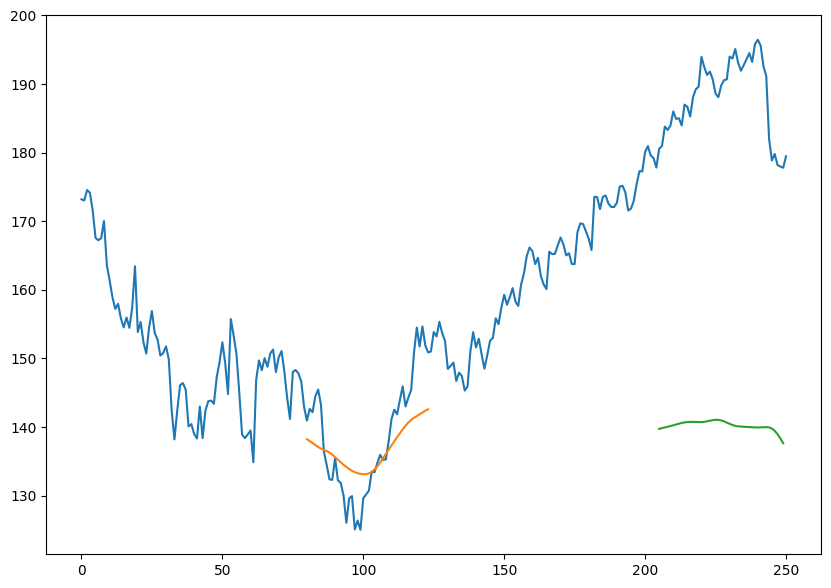

In [ ]:
plt.figure(figsize=(10,7))
plt.plot(scaler.inverse_transform(close_srt))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()
